In [1]:
import pandas as pd

In [2]:

sales_df= pd.read_csv('preprocessed_kc_house_data.csv')

In [3]:
sales_df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,year,month,day
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,0.139265,0.295816,2014,10,13
1,1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,0.206963,0.413516,2014,12,9
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,0.406190,0.438547,2015,2,25
3,3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,0.143133,0.257353,2014,12,9
4,4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,0.228240,0.405468,2015,2,18


In [4]:
print(sales_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19419 entries, 0 to 19418
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     19419 non-null  int64  
 1   price          19419 non-null  float64
 2   bedrooms       19419 non-null  int64  
 3   bathrooms      19419 non-null  float64
 4   sqft_living    19419 non-null  int64  
 5   sqft_lot       19419 non-null  int64  
 6   floors         19419 non-null  float64
 7   waterfront     19419 non-null  int64  
 8   view           19419 non-null  int64  
 9   condition      19419 non-null  int64  
 10  grade          19419 non-null  int64  
 11  sqft_above     19419 non-null  int64  
 12  sqft_basement  19419 non-null  int64  
 13  yr_built       19419 non-null  int64  
 14  yr_renovated   19419 non-null  int64  
 15  sqft_living15  19419 non-null  float64
 16  sqft_lot15     19419 non-null  float64
 17  year           19419 non-null  int64  
 18  month 

In [5]:
sales_df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = sales_df.drop('price', axis=1)
y = sales_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [9]:
y
print(lr_model)

LinearRegression()


In [10]:

y_pred_lr = lr_model.predict(X_test_scaled)


mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Linear Regression R-squared: {r2_lr}")


Linear Regression Mean Squared Error: 35267155275.04131
Linear Regression R-squared: 0.6525956734663769


In [12]:
import numpy as np
from sklearn.metrics import mean_absolute_error
# RMSE
rmse_lr= np.sqrt(mse_lr)

# MAE
mae_lr= mean_absolute_error(y_test, y_pred_lr)
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")
print(f"Mean Absolute Error (MAE): {mae_lr}")

Root Mean Squared Error (RMSE): 187795.514523221
Mean Absolute Error (MAE): 130716.70249583261


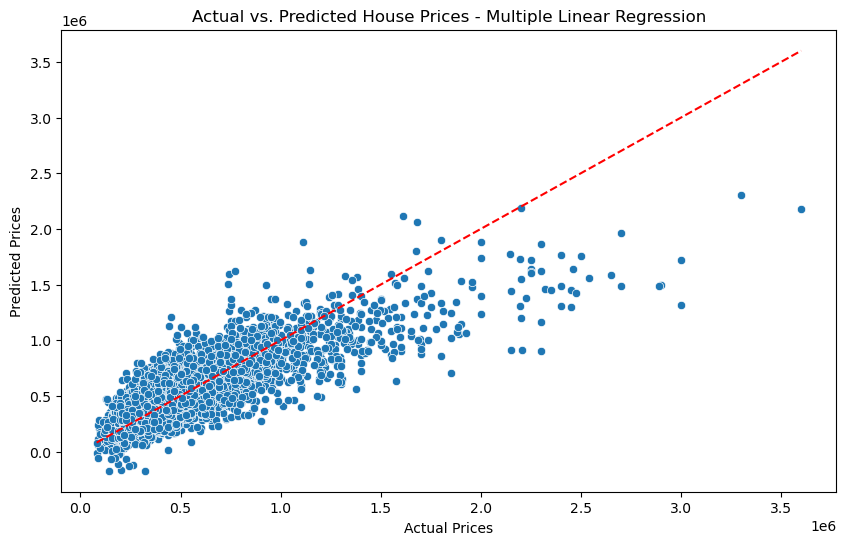

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices - Multiple Linear Regression')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.show()

In [14]:
y_train_pred_lr = lr_model.predict(X_train_scaled)

y_test_pred_lr = lr_model.predict(X_test_scaled)


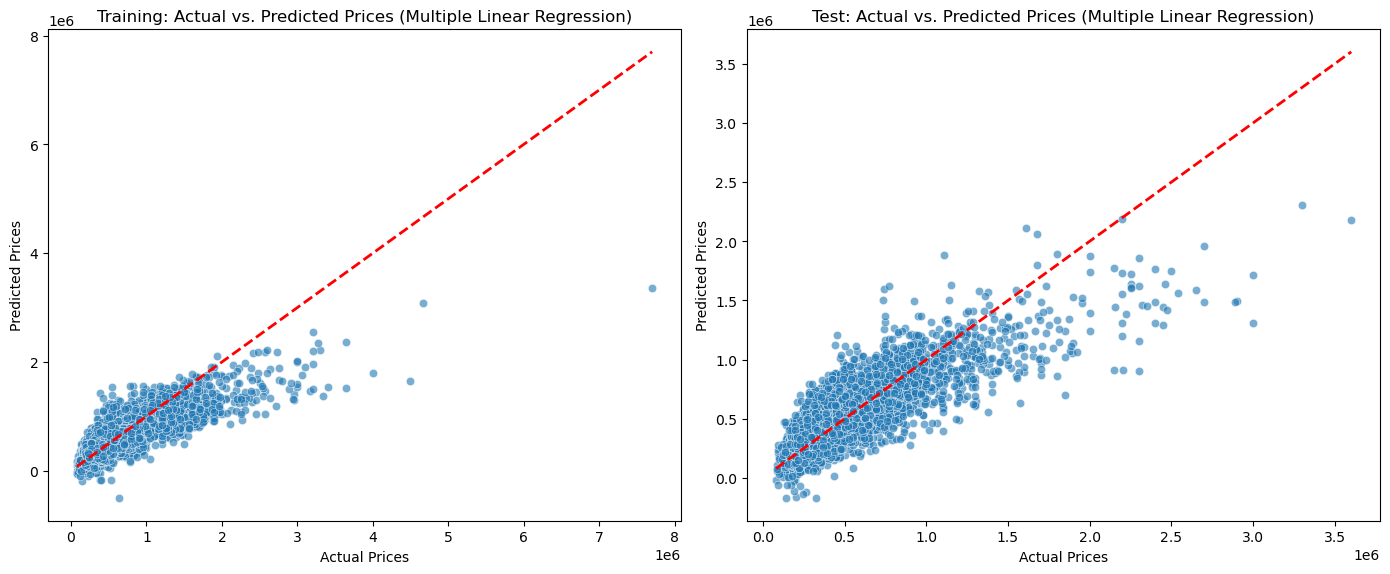

In [15]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) 
sns.scatterplot(x=y_train, y=y_train_pred_lr, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--r', linewidth=2)
plt.title('Training: Actual vs. Predicted Prices (Multiple Linear Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Test: Actual vs. Predicted Prices (Multiple Linear Regression)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()
